## Lab001: Basic NN

## Data sources
https://raw.githubusercontent.com/toche7/DataSets/main/admit.csv



In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/toche7/DataSets/main/admit.csv")

In [39]:
df.head()

,SubjectA,SubjectB,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


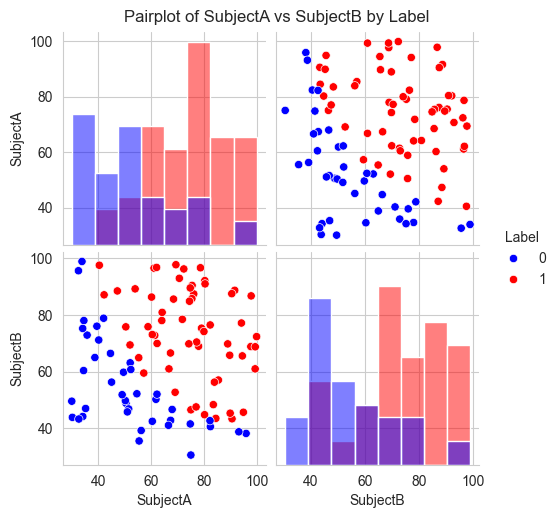

In [40]:
# Please provide SNS pairplot and split color for SubjectA and SubjectB by label
# Create the pairplot
sns.set_style("whitegrid")
pairplot = sns.pairplot(data=df, 
                       vars=['SubjectA', 'SubjectB'],  # Specify the variables to plot
                       hue='Label',                    # Color by Label
                       palette=['blue', 'red'],        # Use blue for 0 and red for 1
                       diag_kind='hist')               # Show histograms on diagonal

plt.suptitle('Pairplot of SubjectA vs SubjectB by Label', y=1.02)
plt.show()


## Visualize data

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
# Data preparation

In [44]:
X = df[['SubjectA', 'SubjectB']]
X.head()

,SubjectA,SubjectB
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [64]:
Y = df[['Label']]
Y.head()
# type(Y)

,Label
0,0
1,0
2,0
3,1
4,1


In [65]:
model.fit(X, Y)

/Users/natthawatboonchaiseree/.pyenv/versions/3.12.3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(2, 50))

In [47]:
model.score(X, Y)

0.89

In [48]:
# We've found that Linear Regression is not the best model for this dataset.
# Then we'll try to build a neural network model.

# We'll use the sklearn library for building a neural network model.

# Start with split testing data from training data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# About Hidden Layers, The default value from sklearn is 100, we can adjust it.
# So we'll use 2 hidden layers with 50 units each.
# model = MLPClassifier(hidden_layer_sizes=(50, 50))

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [50]:
Nnmodel = MLPClassifier()
Nnmodel.fit(X, Y)
Nnmodel.score(X, Y)

/Users/natthawatboonchaiseree/.pyenv/versions/3.12.3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.63

In [59]:
# Start with split testing data from training data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [107]:
# Update the model fitting to use training data
Nnmodel.fit(X_train, y_train)


/Users/natthawatboonchaiseree/.pyenv/versions/3.12.3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(2, 50))

In [129]:
NnModel = MLPClassifier(hidden_layer_sizes=(10, 30), max_iter=1000) # 2 hidden layers with 50 units each, with Iteration = 100
# Hidden layers: 5; Hidden layers value is the number of hidden layers
# Units: 100; Units value is the number of nodes in the hidden layer


NnModel.fit(X_train, y_train)

/Users/natthawatboonchaiseree/.pyenv/versions/3.12.3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/natthawatboonchaiseree/.pyenv/versions/3.12.3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 30), max_iter=1000)

In [114]:
# Please create Neural Network diagram that hidden layers is 2 and 50 units each in Mermaid format

In [130]:
NnModel.intercepts_

[array([ 1.30170618, -0.4096141 ,  0.03659998, -0.30423017,  1.06877467,
        -0.52934675, -1.56013354,  0.81714664, -0.07956142,  0.83167797]),
 array([-0.3520466 ,  0.89473412, -0.11105327, -0.74385153, -0.80350593,
         0.65322001,  0.7848765 ,  1.41380711, -0.36050849,  0.71665814,
         0.63188683, -1.00346897, -0.12844346,  0.08732524, -0.05296929,
        -0.29521661, -0.32844421,  1.4786289 ,  0.47113713, -0.35234343,
        -0.83007169, -1.13735394,  0.48100536, -0.50523564, -0.17768371,
         0.78566882,  0.49006382, -0.65348198, -0.06467465,  0.29712109]),
 array([-0.55149099])]

In [131]:
NnModel.score(X_train, y_train)

0.9625

## Measure the accuracy of the model

How can we know the accuracy of the model?

We'll use the accuracy_score function from sklearn to measure the accuracy of the model.

```python
from sklearn.metrics import accuracy_score

y_pred = NnModel.predict(X_test)
accuracy_score(y_test, y_pred)
```

In [132]:
from sklearn.metrics import accuracy_score

y_pred = NnModel.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [140]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

f1_score(y_test, y_pred)

# Recall and precision are the most common metrics used to evaluate the performance of a classification model.
# Precision is the ratio of true positives to the total predicted positives.
# Recall is the ratio of true positives to the total actual positives.
# Calculate the precision and recall for the predicted values

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)   

# F1 
f1_score = f1_score(y_test, y_pred)
print("F1 Score: ", f1_score)

Precision:  1.0
Recall:  0.8333333333333334
F1 Score:  0.9090909090909091


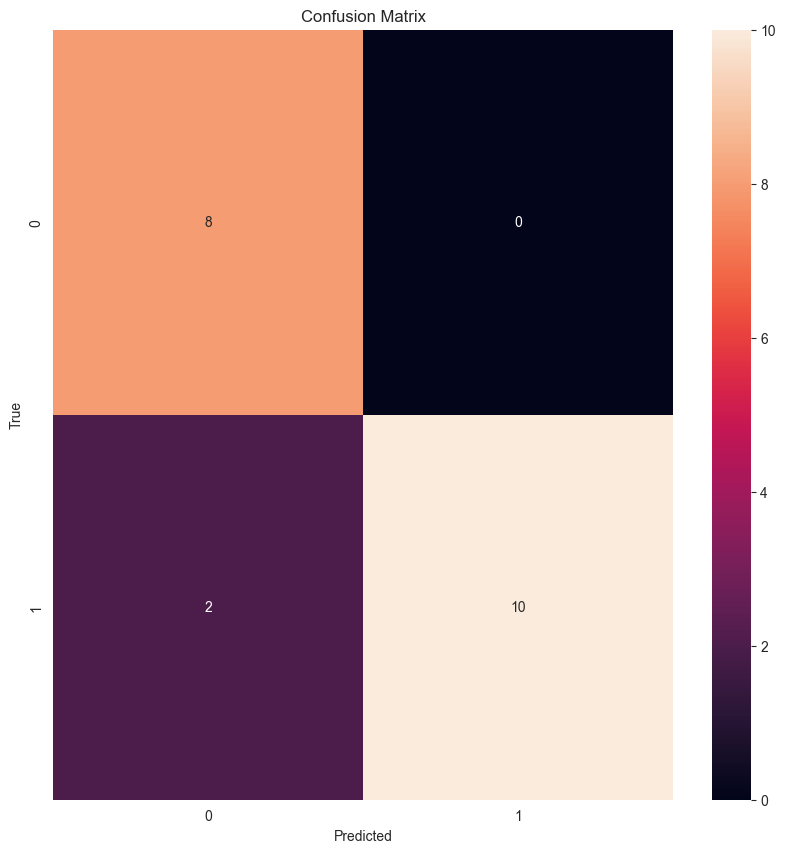

In [141]:
# Plot f1 matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
## Other intesting topics

1. How can we calculate number of hidden layers?
2. How can we calculate number of nodes in each hidden layer?
3. How can we calculate the total number of nodes?

Above questions can be answered using the information provided in the cell above "Neural Network"
Please answer... based on code;

```python
NnModel = MLPClassifier(hidden_layer_sizes=(2, 50), max_iter=1000) # 2 hidden layers with 50 units each, with Iteration = 100

```

1. 2
2. 2. 50
3. 2 x 50 = 100

